In [1]:
from pynamicalsys import DiscreteDynamicalSystem as dds
import time
# Define the symplectic map
ds = dds(model="4d symplectic map")

In [40]:
import numpy as np

# Initial conditions
u = [[0.5, 0, 0.5, 0], # Initial condition 1
     [3.0, 0, 0.5, 0]] # Initial condition 2

# Parameters for the symplectic map
eps1 = 0.5
eps2 = 0.1
xi = 0.001
parameters = [eps1, eps2, xi]

# Number of deviation vectors
k = [2, 3, 4]

# Total time for the simulation
total_time = 1000000

# Sample times for the LDI computation
sample_times = np.unique(np.logspace(np.log10(1), np.log10(total_time), 1000).astype(int))

In [ ]:

# Compute the LDI for each initial condition and each k
LDIs = np.zeros((len(u), total_time, len(k)))
GALIs = np.zeros((len(u), total_time, len(k)))
for i in range(len(u)):
    for j in range(len(k)):
        print(i, j)
        time_ini = time.time()
        ldi = ds.LDI(u[i], total_time, k[j], parameters=parameters, return_history=True)
        time_end = time.time()
        print(f"LDI: {time_end - time_ini:.2f} s")
        LDIs[i, :, j] = ldi
        time_ini = time.time()
        gali = ds.GALI(u[i], total_time, k[j], parameters=parameters, return_history=True)
        time_end = time.time()
        print(f"GALI: {time_end - time_ini:.2f} s")
        GALIs[i, :, j] = gali
        print()

<Figure size 640x480 with 0 Axes>

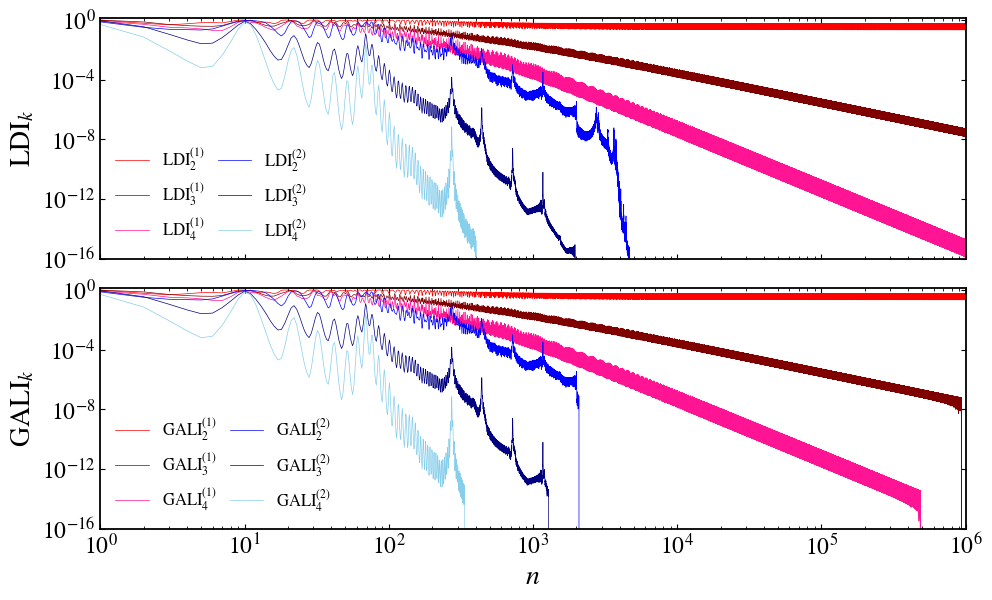

In [9]:
from pynamicalsys import PlotStyler
import matplotlib.pyplot as plt

# Create a plot styler
ps = PlotStyler(linewidth=.5, legend_fontsize=12)
ps.apply_style()

# Create the figure and axis for the plot
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 6))

# Plot the LDI for each initial condition and k
colors = [["red", "maroon", "deeppink"], ["blue", "navy", "skyblue"]]
times = np.arange(1, total_time + 1)
for i in range(len(u)):
    for j in range(len(k)):
        ax[0].plot(times, LDIs[i, :, j], label=rf"$\mathrm{{LDI}}_{k[j]}^{{({i + 1})}}$", color=colors[i][j])
        ax[1].plot(times, GALIs[i, :, j], label=rf"$\mathrm{{GALI}}_{k[j]}^{{({i + 1})}}$", color=colors[i][j])

# Add a legend and set the limits and labels
ax[0].legend(ncol=2, frameon=False, columnspacing=0.75)
ax[1].legend(ncol=2, frameon=False, columnspacing=0.75)
ax[0].set_ylim(1e-16, np.sqrt(2))
ax[0].set_xlim(1, total_time)
ax[-1].set_xlabel("$n$")
ax[0].set_ylabel(r"$\mathrm{LDI}_k$")
ax[1].set_ylabel(r"$\mathrm{GALI}_k$")
ax[0].set_xscale('log')
ax[0].set_yscale("log")
plt.tight_layout(pad=0.5)
plt.savefig("/Users/mrolims/test.png", dpi=400)